# How does volatility impact returns - part 2

In part 1 of "How does volatility impact returns?", we looked at scenarios where the mean return was the same, but volatility (standard deviation) was different. The conclusions were that:
* Volatility does not have an impact on *expected* returns
* But volatility does impact the probability of reaching various financial goals

However, in the real world, lower volatility often results in lower average returns:

> "When volatility increases, risk increases and returns decrease. Risk is represented by the dispersion of returns around the mean." (http://www.investopedia.com/articles/financial-theory/08/volatility.asp#ixzz4KG4pag92)

So in this **part 2**, we'll look at whether its better to invest in higher-risk/higher average return funds, or lower-risk/lower average return funds.

### So what's the relationship between mean returns and volatility?

According to empirical analysis of Vanguard's mutual funds (see vanguard_fund_analysis), here is an equation to relate mean return with expected mean standard deviation:

In [75]:
def investment_mean_to_std(mean_return):
    """ Given the mean return, output the standard deviation return. """
    slope = 3.4856115546738726
    intercept = 2.2961232860559
    return slope * mean_return + intercept

In [76]:
mutual_fund_mean_returns = [10, 8, 6, 4]
mutual_fund_std_returns = [investment_mean_to_std(mean_return) for mean_return in mutual_fund_mean_returns]
mutual_fund_std_returns

[37.15223883279463, 30.18101572344688, 23.209792614099133, 16.23856950475139]

Okay, so now we have some good numbers to go on to build some hypothetical funds to analyze...

## Hypothetical Funds

* Fund 1: return mean: 10%, standard deviation: 37.15%
* Fund 2: return mean: 8%, standard deviation: 30.18%
* Fund 3: return mean: 6%, standard deviation: 23.21%
* Fund 4: return mean: 4%, standard deviation: 16.24%

And again, we will be contributing **$5,500 per year** to these funds, and running the simulation for **30 years**.

In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

### Simulation functions (developed in part 1)

In [78]:
def generate_return_rates(return_mean, return_std, years):
    return return_mean + return_std * np.random.randn(years)

def calculate_fund_returns(contribution_per_year, returns_by_year, starting_principal=0):
    """ Calculate the fund returns for the sequence of years given.
    
    Parameters:
        * contributsions_per_year - float representing dollars contributed per year
        * returns_by_year - list of percent returns per year like [.1, -.05, ...].
    Returns the fund value by year - a list like this:
        [1000, 1026.25, 1223.75, 1100.75, ...]
    """
    principal = starting_principal
    value_by_year = []
    for return_rate in returns_by_year:
        # Add the contribution first thing each year
        principal = principal + contribution_per_year
        
        # Calculate growth/loss
        principal = principal * (1 + return_rate)
        
        value_by_year.append(principal)

    return value_by_year

### Fund definitions

In [79]:
def make_mutual_fund(return_mean, return_std, years, yearly_addition):
    fund_return_rates = [percent / 100 for percent in generate_return_rates(return_mean, return_std, years)]
    fund_value_by_year = calculate_fund_returns(yearly_addition, fund_return_rates)
    return fund_value_by_year

def get_fund1_returns(): return make_mutual_fund(10, 37.15, 30, 5500)
def get_fund2_returns(): return make_mutual_fund(8, 30.18, 30, 5500)
def get_fund3_returns(): return make_mutual_fund(6, 23.21, 30, 5500)
def get_fund4_returns(): return make_mutual_fund(4, 16.24, 30, 5500)

Just to make sure everything looks good, let's graph some example returns from fund4:

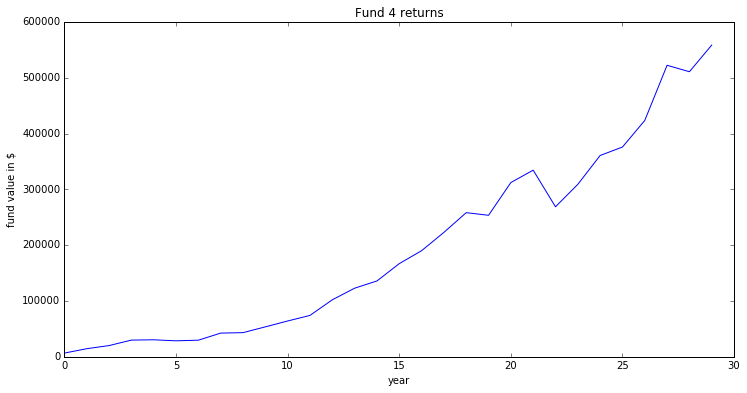

In [80]:
years = range(30)
setup_graph(title='Fund 4 returns', x_label='year', y_label='fund value in $', fig_size=(12,6))
plt.plot(years, get_fund4_returns())

### Let's now calculate expected returns for each fund

In [81]:
num_trials = 100000
fund1_end_returns_per_trial = [get_fund1_returns()[-1] for i in range(num_trials)]
fund2_end_returns_per_trial = [get_fund2_returns()[-1] for i in range(num_trials)]
fund3_end_returns_per_trial = [get_fund3_returns()[-1] for i in range(num_trials)]
fund4_end_returns_per_trial = [get_fund4_returns()[-1] for i in range(num_trials)]

In [82]:
print('Fund 1 expected return: {}'.format(sum(fund1_end_returns_per_trial) / num_trials))
print('Fund 2 expected return: {}'.format(sum(fund2_end_returns_per_trial) / num_trials))
print('Fund 3 expected return: {}'.format(sum(fund3_end_returns_per_trial) / num_trials))
print('Fund 4 expected return: {}'.format(sum(fund4_end_returns_per_trial) / num_trials))

Fund 1 expected return: 1001329.9899223042
Fund 2 expected return: 676578.2954660963
Fund 3 expected return: 459744.282021185
Fund 4 expected return: 320612.81052237


## What's the probability of reaching, say, $200,000?

In [83]:
print('Fund 1 expected return: {}'.format(len([i for i in fund1_end_returns_per_trial if i >= 200000]) / num_trials))
print('Fund 2 expected return: {}'.format(len([i for i in fund2_end_returns_per_trial if i >= 200000]) / num_trials))
print('Fund 3 expected return: {}'.format(len([i for i in fund3_end_returns_per_trial if i >= 200000]) / num_trials))
print('Fund 4 expected return: {}'.format(len([i for i in fund4_end_returns_per_trial if i >= 200000]) / num_trials))

Fund 1 expected return: 0.64582
Fund 2 expected return: 0.68698
Fund 3 expected return: 0.71016
Fund 4 expected return: 0.70011


Wow, so the higher-volatility/higher-return funds have a MUCH better chance of getting this modest amount.

### What's the probability of reaching, say, $500,000?

In [84]:
print('Fund 1 expected return: {}'.format(len([i for i in fund1_end_returns_per_trial if i >= 500000]) / num_trials))
print('Fund 2 expected return: {}'.format(len([i for i in fund2_end_returns_per_trial if i >= 500000]) / num_trials))
print('Fund 3 expected return: {}'.format(len([i for i in fund3_end_returns_per_trial if i >= 500000]) / num_trials))
print('Fund 4 expected return: {}'.format(len([i for i in fund4_end_returns_per_trial if i >= 500000]) / num_trials))

Fund 1 expected return: 0.39156
Fund 2 expected return: 0.36988
Fund 3 expected return: 0.29027
Fund 4 expected return: 0.14279


Looking at these 2 scenarios, it seems like going with the higher-return/higher-volatility funds is the better bet, because, like in this case, you are only losing ~5% chance of getting to `$`200,000 with the most risky fund compared to the least-risky one, but you have a 39% chance of reaching $500,000 with the most risky, compared to a mere 14% chance with the most conservative.

Keep in mind that only investing $5,500 over the course of 30 years would yield `$`165,000 with 0% interest.
